In [569]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [570]:
# подгружаем данные и смотрим на них
data = pd.read_csv('data.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [571]:
# посмотрим на полный список доступных признаков
sorted(data.columns.tolist())

['availability_365',
 'calculated_host_listings_count',
 'host_id',
 'host_name',
 'id',
 'last_review',
 'latitude',
 'longitude',
 'minimum_nights',
 'name',
 'neighbourhood',
 'neighbourhood_group',
 'number_of_reviews',
 'price',
 'reviews_per_month',
 'room_type']

In [572]:
# сколько их
data.shape

(48895, 16)

In [573]:
# какого типа эти данные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [574]:
# Удалим стобцы, перечисленные в задании
list_to_drop=[ "id","name", "host_id", "host_name", "last_review" ]
data=data.drop(list_to_drop,axis=1)
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [575]:
# посмотрим где много пропусков
np.round(data.isna().sum()[data.isna().sum()>0] / data.shape[0], 2)

reviews_per_month    0.21
dtype: float64

In [576]:
# посмотрим что будет, если дропнуть строки с пропущенными значениями
data.dropna().shape[0] / data.shape[0]

0.7944166070150323

In [577]:
# Посмотрим на корреляцию признака reviews_per_month c целевой переменной price:
data.price.corr(data.reviews_per_month)
# Кореляция весьма низкая - данным столбцом можно пренебречь

-0.03060834856753313

In [578]:
# Удалим стобец и посмотрим, что пропущенных данных больше нет
data=data.drop(["reviews_per_month"],axis=1)
data.dropna().shape[0] / data.shape[0]

1.0

In [579]:
#средняя по датасету
data.mean(numeric_only=True)


latitude                           40.728949
longitude                         -73.952170
price                             152.720687
minimum_nights                      7.029962
number_of_reviews                  23.274466
calculated_host_listings_count      7.143982
availability_365                  112.781327
dtype: float64

In [580]:
#медиана по датасету
data.median(numeric_only=True)

latitude                           40.72307
longitude                         -73.95568
price                             106.00000
minimum_nights                      3.00000
number_of_reviews                   5.00000
calculated_host_listings_count      1.00000
availability_365                   45.00000
dtype: float64

<AxesSubplot:>

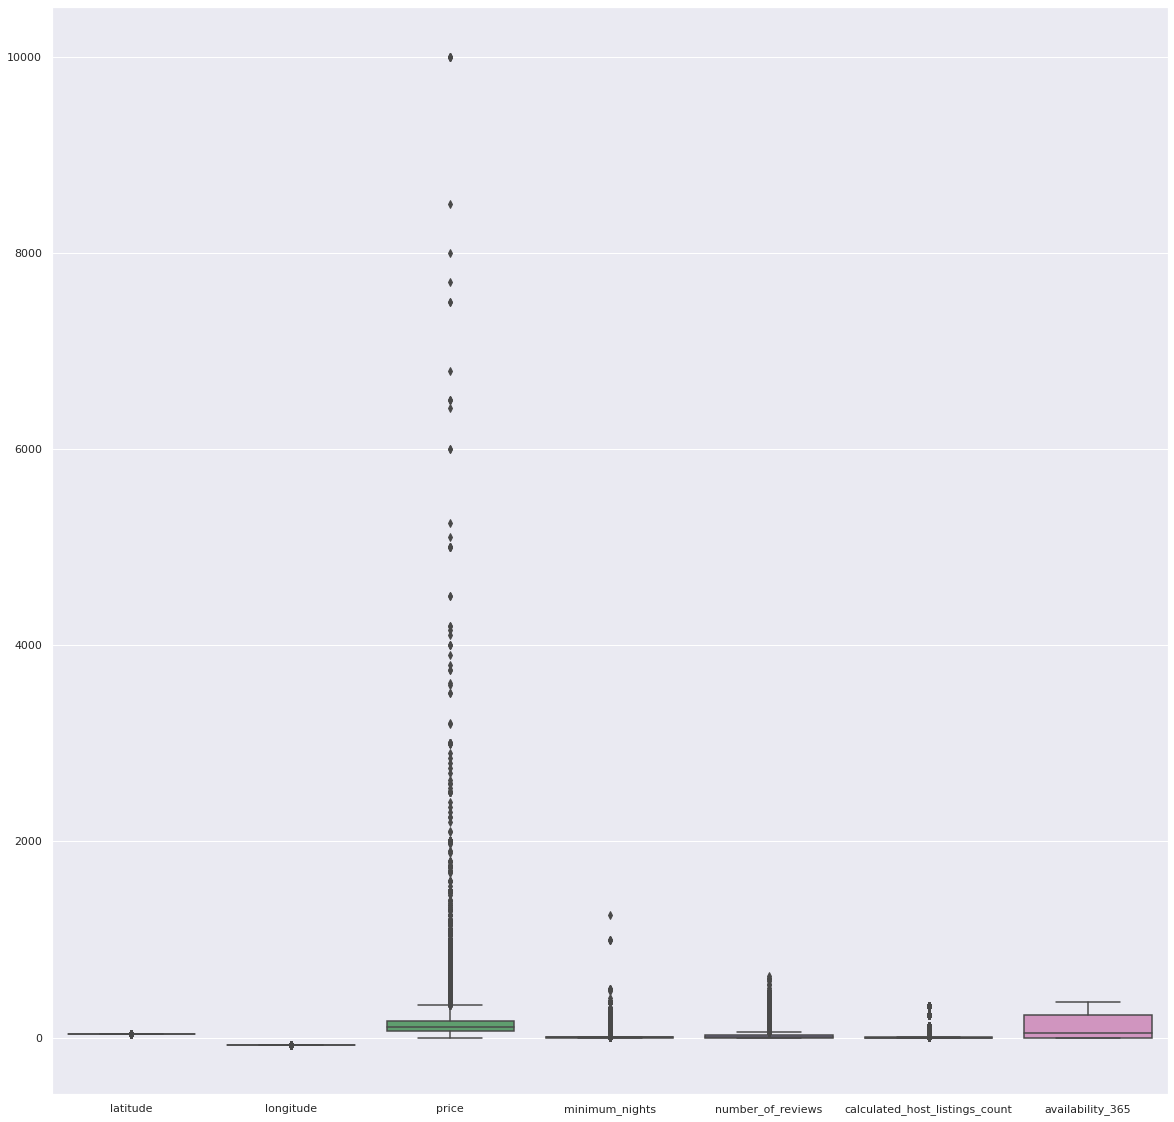

In [581]:
sns.set(rc={'figure.figsize':(20,20)})
sns.boxplot(data=data)

Видим довольно сильные выбросы по минимальному количеству ночей,ценам, количествам просмотров,количеством обзоров

<AxesSubplot:>

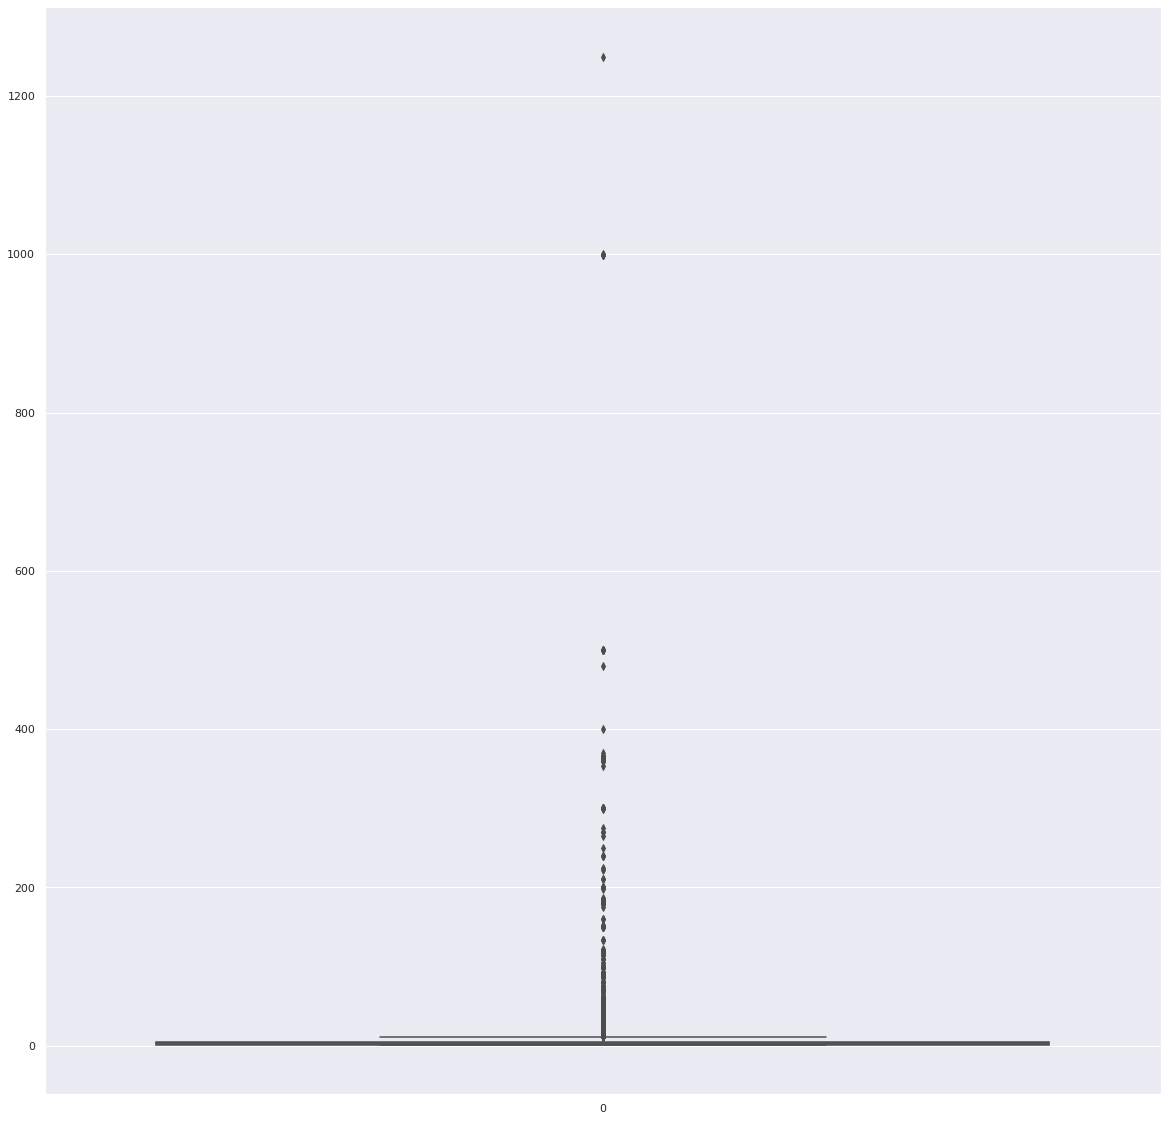

In [582]:
sns.boxplot(data=data.minimum_nights)

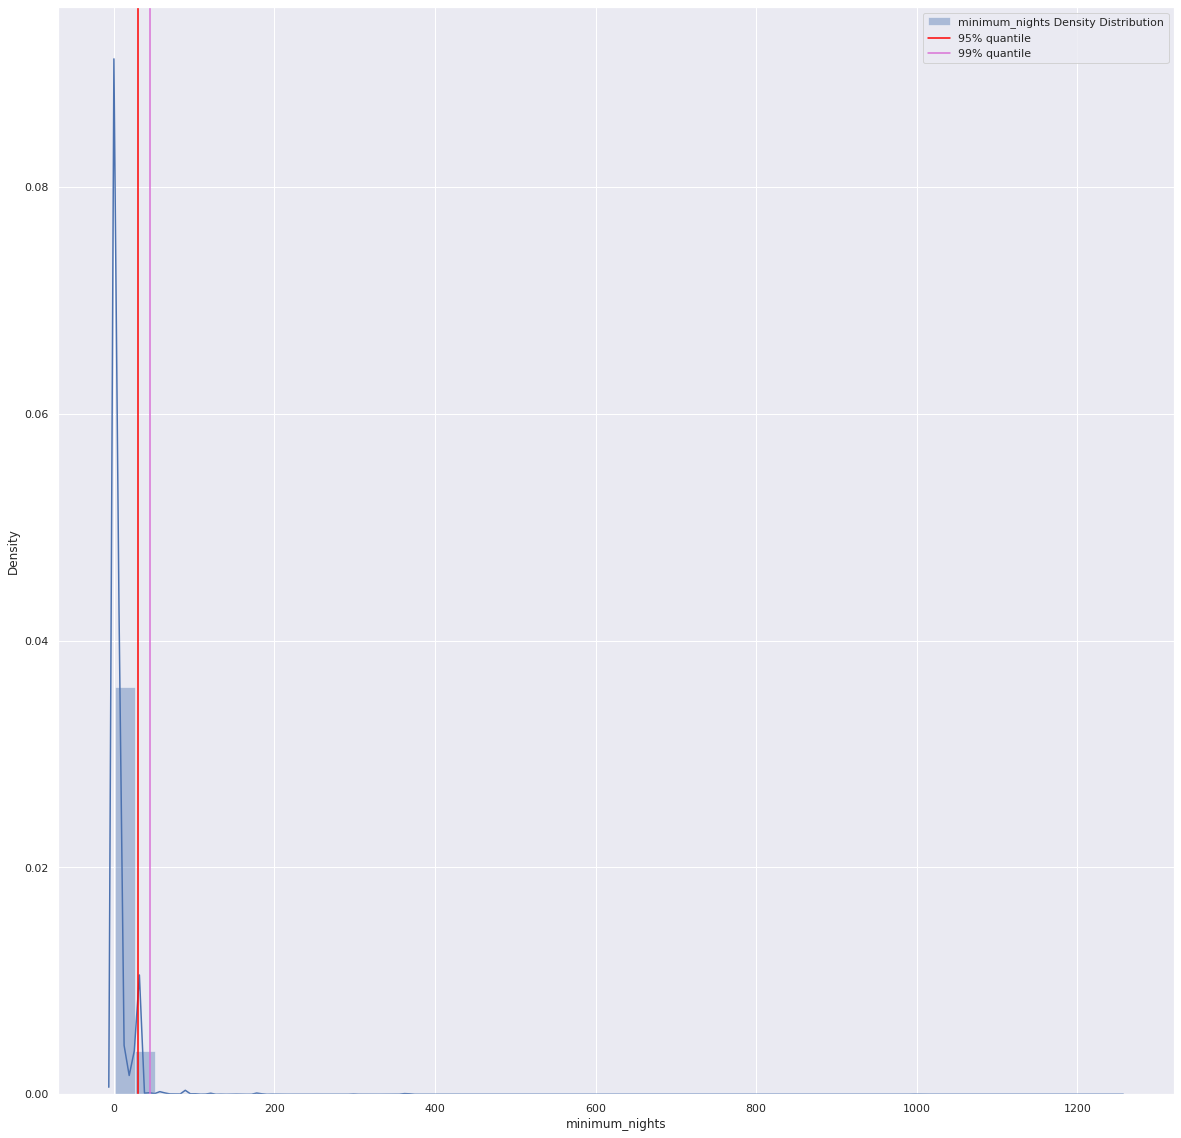

In [583]:
sns.distplot(data['minimum_nights'], label='minimum_nights Density Distribution')
plt.axvline(data.minimum_nights.quantile(0.95), label='95% quantile', c='red')
plt.axvline(data.minimum_nights.quantile(0.99), label='99% quantile', c='orchid')
plt.legend()
plt.show()

вижим огромный хвост справа

In [584]:
data=data.loc[data.minimum_nights<data.minimum_nights.quantile(0.98)]
data.shape

(44388, 10)

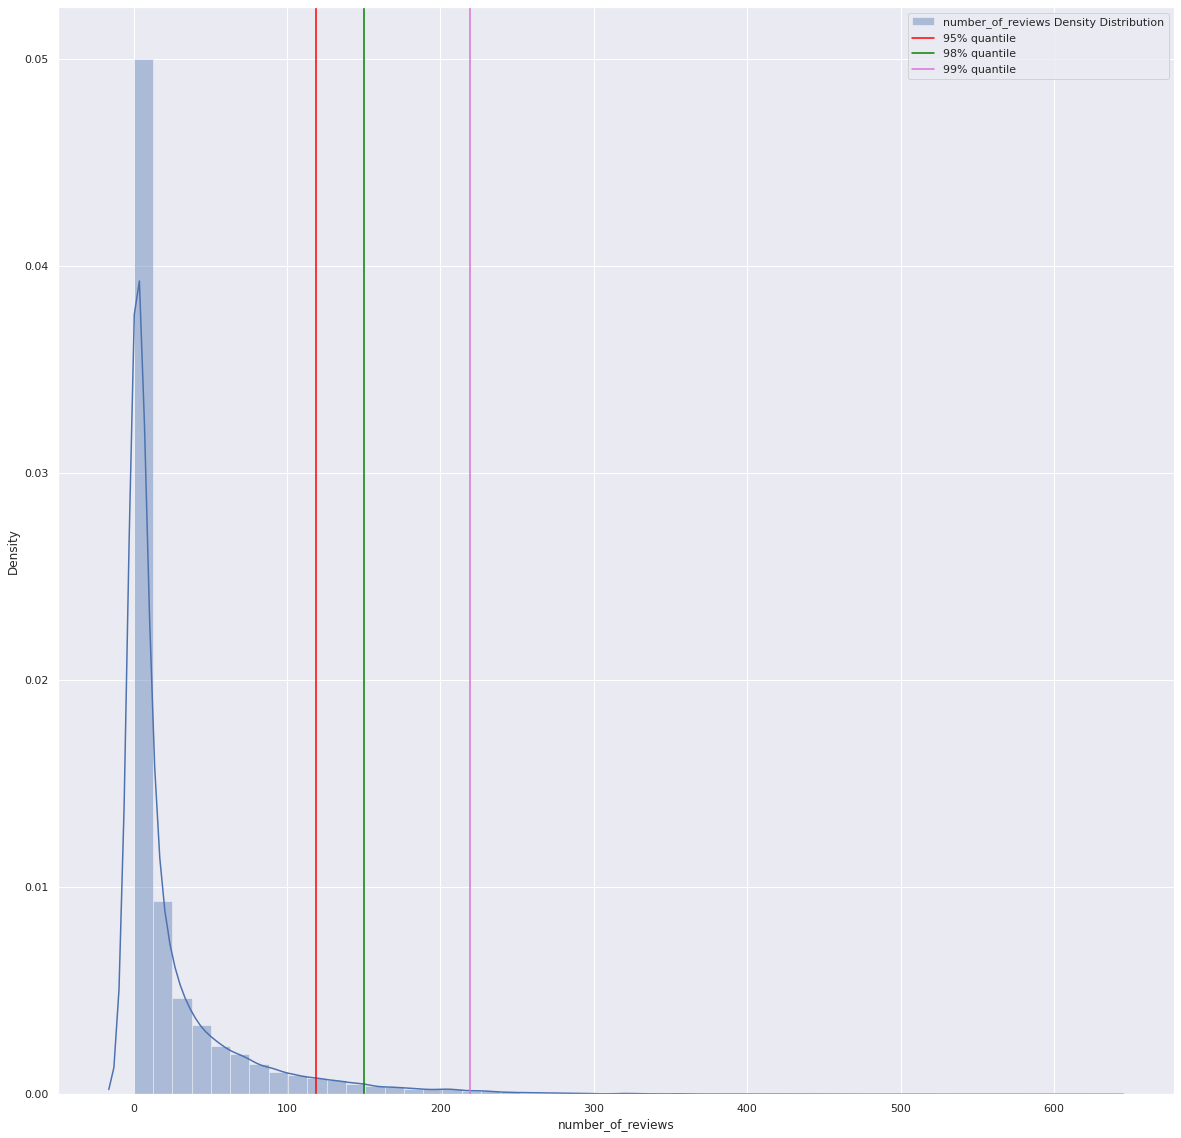

In [585]:
sns.distplot(data['number_of_reviews'], label='number_of_reviews Density Distribution')
plt.axvline(data.number_of_reviews.quantile(0.95), label='95% quantile', c='red')
plt.axvline(data.number_of_reviews.quantile(0.97), label='98% quantile', c='green')
plt.axvline(data.number_of_reviews.quantile(0.99), label='99% quantile', c='orchid')
plt.legend()
plt.show()

In [586]:
data=data.loc[data.number_of_reviews<data.number_of_reviews.quantile(0.97)]
data.shape

(43040, 10)

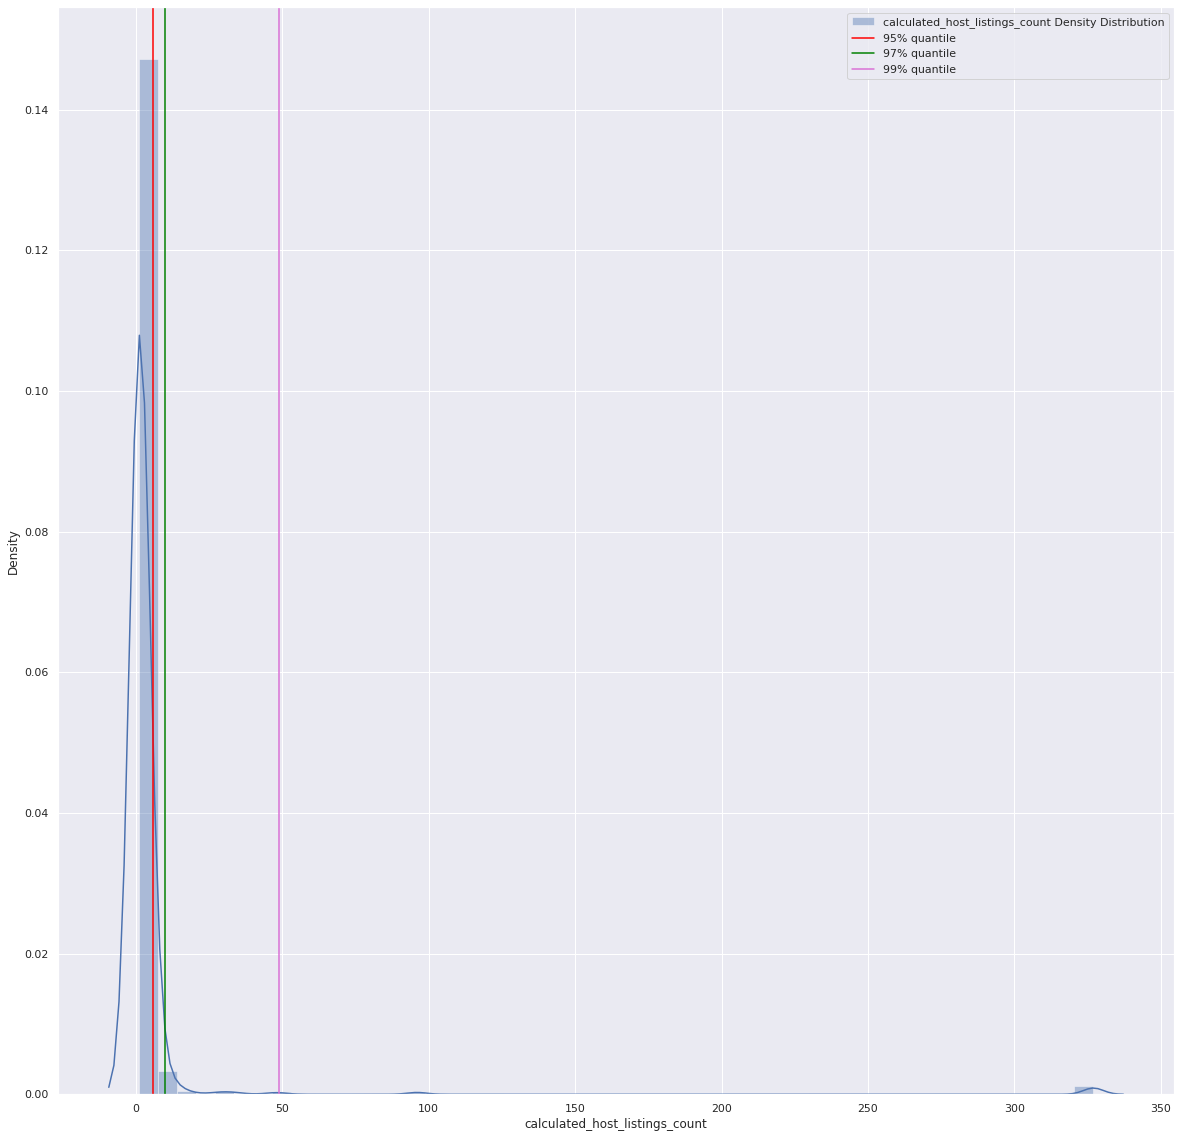

In [587]:
sns.distplot(data['calculated_host_listings_count'], label='calculated_host_listings_count Density Distribution')
plt.axvline(data.calculated_host_listings_count.quantile(0.95), label='95% quantile', c='red')
plt.axvline(data.calculated_host_listings_count.quantile(0.97), label='97% quantile', c='green')
plt.axvline(data.calculated_host_listings_count.quantile(0.99), label='99% quantile', c='orchid')
plt.legend()
plt.show()

In [588]:
data=data.loc[data.calculated_host_listings_count<data.calculated_host_listings_count.quantile(0.96)]
data.shape

(41308, 10)

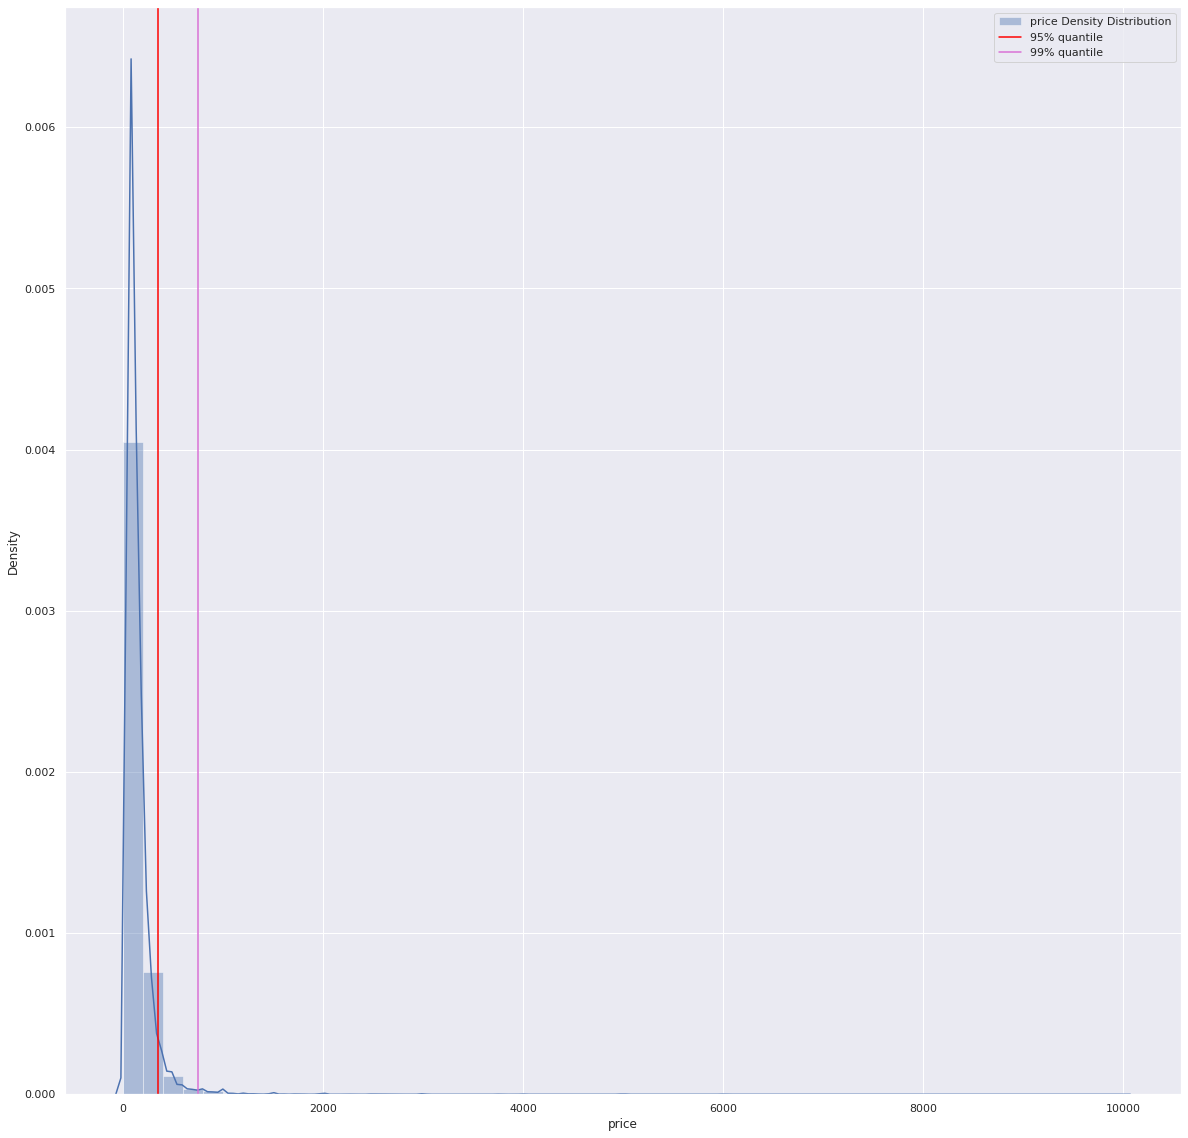

In [589]:
sns.distplot(data['price'], label='price Density Distribution')
plt.axvline(data.price.quantile(0.95), label='95% quantile', c='red')
plt.axvline(data.price.quantile(0.99), label='99% quantile', c='orchid')
plt.legend()
plt.show()

In [590]:
data=data.loc[data.price<data.price.quantile(0.98)]
data.shape

(40333, 10)

<AxesSubplot:>

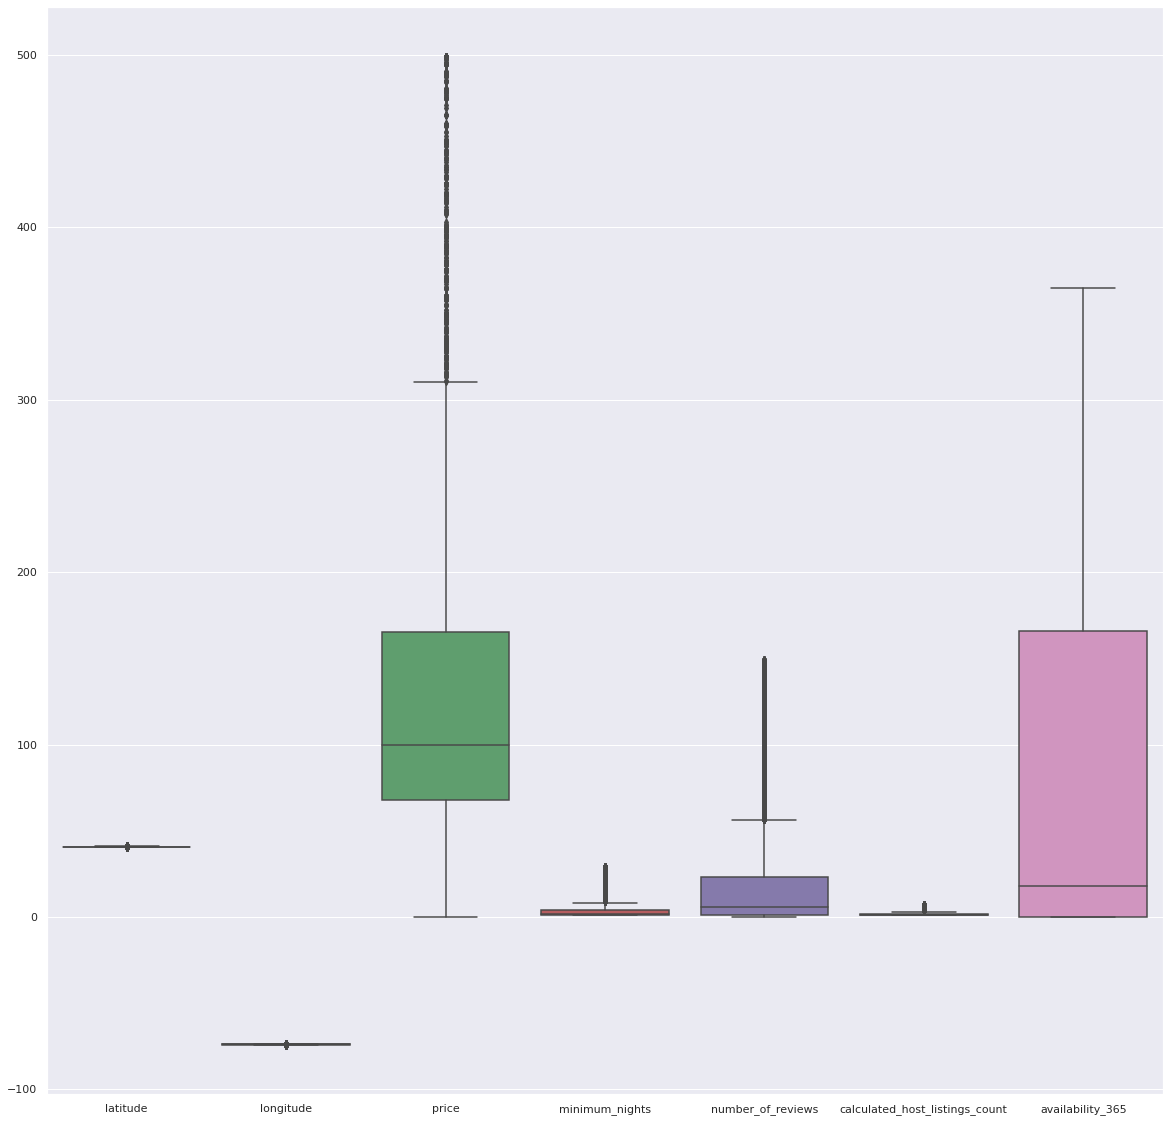

In [591]:
sns.boxplot(data=data)

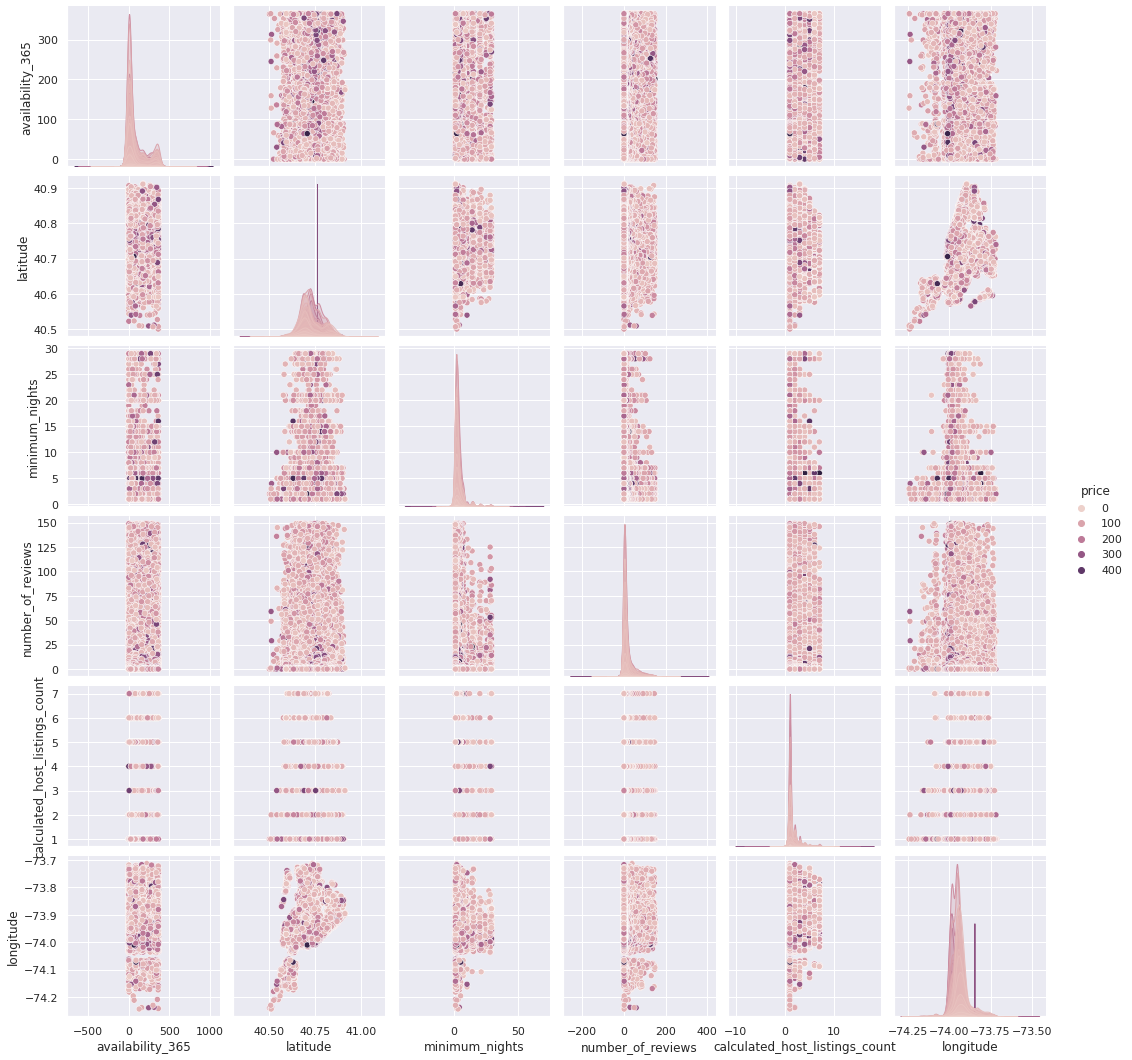

In [592]:
# Проведем корреляционный анализ, получим 8 наиболее корелирующих признаков
k = 8 
corrmat = data.corr()
cols = corrmat.nlargest(k, 'price')['price'].index.tolist()
sns.pairplot(data=data[cols], hue='price')
plt.show()

In [593]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40333 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             40333 non-null  object 
 1   neighbourhood                   40333 non-null  object 
 2   latitude                        40333 non-null  float64
 3   longitude                       40333 non-null  float64
 4   room_type                       40333 non-null  object 
 5   price                           40333 non-null  int64  
 6   minimum_nights                  40333 non-null  int64  
 7   number_of_reviews               40333 non-null  int64  
 8   calculated_host_listings_count  40333 non-null  int64  
 9   availability_365                40333 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 4.4+ MB


In [594]:
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [595]:
data.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'East Harlem', 'Murray Hill',
       'Upper West Side', 'Williamsburg', 'Crown Heights', 'Park Slope',
       'Bedford-Stuyvesant', 'Windsor Terrace', 'Inwood',
       "Hell's Kitchen", 'East Village', 'Flatbush', 'South Slope',
       'Fort Greene', 'Prospect-Lefferts Gardens', 'Kips Bay',
       'Lower East Side', 'Greenpoint', 'Upper East Side', 'Clinton Hill',
       'Washington Heights', 'Bushwick', 'Prospect Heights',
       'West Village', 'Flatlands', 'Cobble Hill', 'Flushing',
       'Boerum Hill', 'DUMBO', 'Gowanus', 'Financial District',
       'Ridgewood', 'Morningside Heights', 'Chelsea', 'Jamaica',
       'Middle Village', 'Highbridge', 'NoHo', 'Ditmars Steinway',
       'Flatiron District', 'Roosevelt Island', 'Chinatown',
       'Greenwich Village', 'Little Italy', 'Tompkinsville',
       'Clason Point', 'Carroll Gardens', 'Brooklyn Heights', 'Astoria',
       'Queens Village', 'Rockaway Beach', 'Forest Hills', 'Nolita',
       

In [596]:
data.neighbourhood.nunique()

219

In [597]:
data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [598]:
#Зададим функцию, которая кодирует категориальные признаки выбранным методом.
#Так как признаков neighbourhood крайне много - использовать групповым методом one hook encoding - мы не будем
def encode_func(data, enc, cols = ['room_type','neighbourhood_group','neighbourhood']):
  data_enc = data.copy()
  data_enc[cols]= enc.fit_transform(data_enc[cols])
  return data_enc


In [599]:
results = {}

In [600]:
#Качество будем оценивать по R2,MAE,RMSE мерам.
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

def evaluate_encoding(data_enc):
  result = {}
  linear = LinearRegression()
  standart_scaler = StandardScaler()
  robust_scaler = RobustScaler()
  for scaler in standart_scaler,robust_scaler:
    scaled_data = scaler.fit_transform(data_enc.drop('price', axis = 1))
    linear_r2 = np.mean(cross_val_score(linear, scaled_data, y = data_enc.price, cv = 5, scoring = 'r2'))
    linear_mse = np.mean(cross_val_score(linear, scaled_data, y = data_enc.price, cv = 5, scoring = 'neg_mean_absolute_error'))
    linear_rmse = np.mean(cross_val_score(linear, scaled_data, y = data_enc.price, cv = 5, scoring = 'neg_root_mean_squared_error'))
    result[type(scaler).__name__+'_r2']=linear_r2
    result[type(scaler).__name__+'_mse']=linear_mse
    result[type(scaler).__name__+'_rmse']=linear_rmse
  return result

In [601]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
data_enc = encode_func(data, enc)
data_enc.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,1.0,107.0,40.64749,-73.97237,1.0,149,1,9,6,365
1,2.0,126.0,40.75362,-73.98377,0.0,225,1,45,2,355
2,2.0,93.0,40.80902,-73.94190,1.0,150,3,0,1,365
4,2.0,61.0,40.79851,-73.94399,0.0,80,10,9,1,0
5,2.0,136.0,40.74767,-73.97500,0.0,200,3,74,1,129


In [602]:
results['Ordinal_encoding']=dict(evaluate_encoding(data_enc))

In [603]:
from category_encoders import CountEncoder
enc = CountEncoder()
data_enc = encode_func(data, enc)
data_enc.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,17546,154,40.64749,-73.97237,19384,149,1,9,6,365
1,16587,879,40.75362,-73.98377,20071,225,1,45,2,355
2,16587,2327,40.80902,-73.94190,19384,150,3,0,1,365
4,16587,975,40.79851,-73.94399,20071,80,10,9,1,0
5,16587,234,40.74767,-73.97500,20071,200,3,74,1,129


In [604]:
results['Count_encoding'] = evaluate_encoding(data_enc)

In [605]:
data_enc['neighbourhood_group'] = data_enc['neighbourhood_group']/data.shape[0]
data_enc['neighbourhood'] = data_enc['neighbourhood']/data.shape[0]
data_enc['room_type'] = data_enc['room_type']/data.shape[0]
data_enc.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0.435028,0.003818,40.64749,-73.97237,0.480599,149,1,9,6,365
1,0.411251,0.021794,40.75362,-73.98377,0.497632,225,1,45,2,355
2,0.411251,0.057695,40.80902,-73.94190,0.480599,150,3,0,1,365
4,0.411251,0.024174,40.79851,-73.94399,0.497632,80,10,9,1,0
5,0.411251,0.005802,40.74767,-73.97500,0.497632,200,3,74,1,129


In [606]:
results['Frequency_encoding'] = evaluate_encoding(data_enc)

In [607]:
pd.DataFrame(results)
# results


,Ordinal_encoding,Count_encoding,Frequency_encoding
StandardScaler_r2,0.376175,0.125547,0.125547
StandardScaler_mse,-45.630532,-57.795604,-57.795604
StandardScaler_rmse,-65.589488,-77.646206,-77.646206
RobustScaler_r2,0.376175,0.125547,0.125547
RobustScaler_mse,-45.630532,-57.795604,-57.795604
RobustScaler_rmse,-65.589488,-77.646206,-77.646206


видим сопоставимые результаты count_encoding=frequency_encoding, наилучший показатель у ordinal_encoding. методика шкалирования разницы не имеет. результаты полностью идентичны

In [608]:
enc = OrdinalEncoder()
data = encode_func(data, enc)
scaled_data = StandardScaler().fit_transform(data_enc.drop('price', axis = 1))

In [609]:
def ordinal_standart_evaluate(data_enc,answer_name,answers):
    result = {}
    linear = LinearRegression()
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_enc.drop(answer_name, axis = 1))
    linear_r2 = np.mean(cross_val_score(linear, scaled_data, y = answers, cv = 5, scoring = 'r2'))
    linear_mse = np.mean(cross_val_score(linear, scaled_data, y = answers, cv = 5, scoring = 'neg_mean_absolute_error'))
    linear_rmse = np.mean(cross_val_score(linear, scaled_data, y = answers, cv = 5, scoring = 'neg_root_mean_squared_error'))
    result['r2']=linear_r2
    result['mse']=linear_mse
    result['rmse']=linear_rmse
    return result

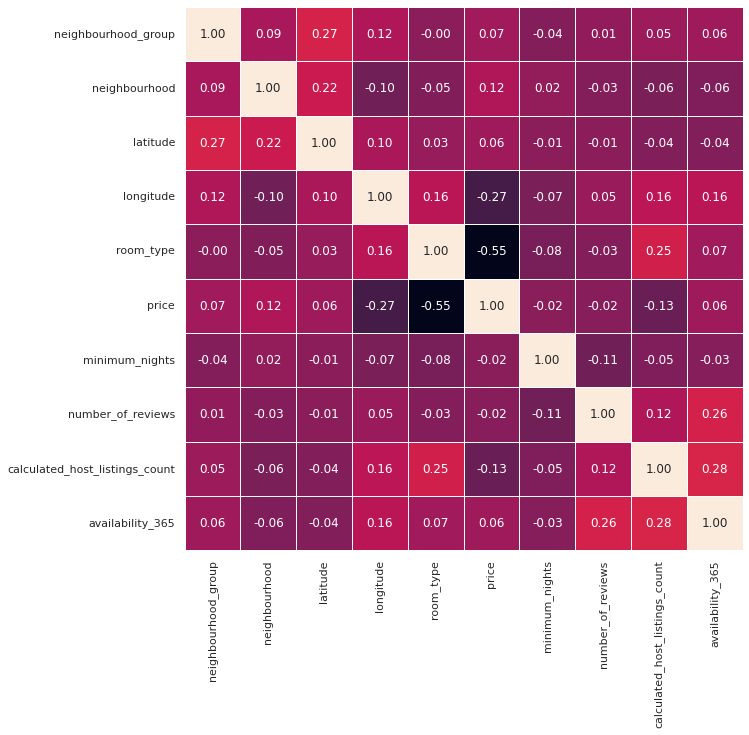

In [610]:
#Посмотрим на кореляцию наших данных
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

In [611]:
#еще раз посмотрим на результаты и будем их сравнивать в дальнейшем
ordinal_standart_evaluate(data,'price',data.price)

{'r2': 0.3761750646348506,
 'mse': -45.63053191986312,
 'rmse': -65.58948825072699}

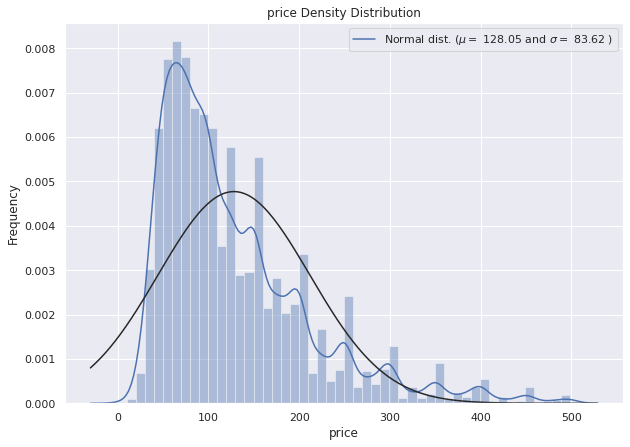

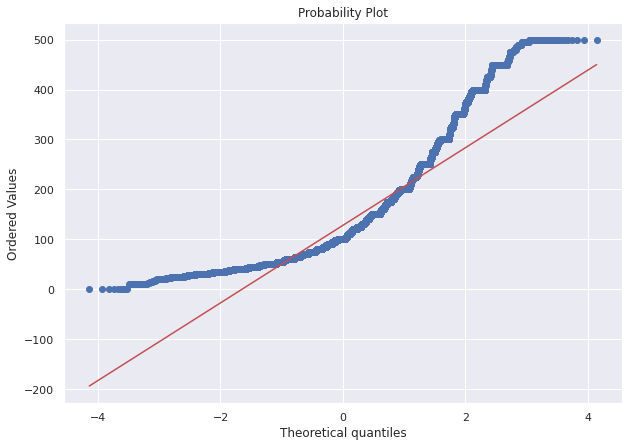

In [612]:
from scipy import stats
from scipy.stats import norm

plt.figure(figsize=(10,7))
sns.distplot(data.price, fit=norm)

# фитим распределение
(mu, sigma) = norm.fit(data.price)

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('price Density Distribution')

plt.figure(figsize=(10,7))
stats.probplot(data['price'], plot=plt)
plt.show()

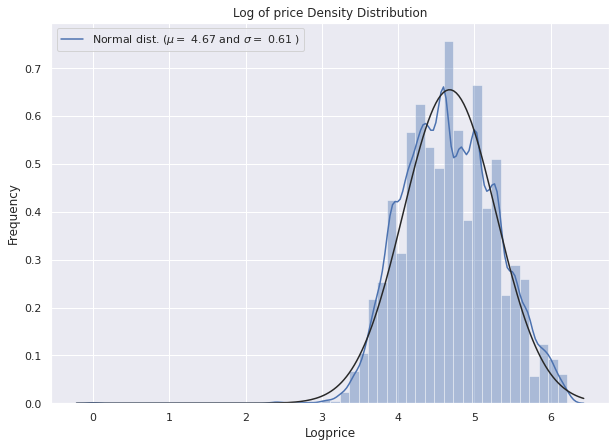

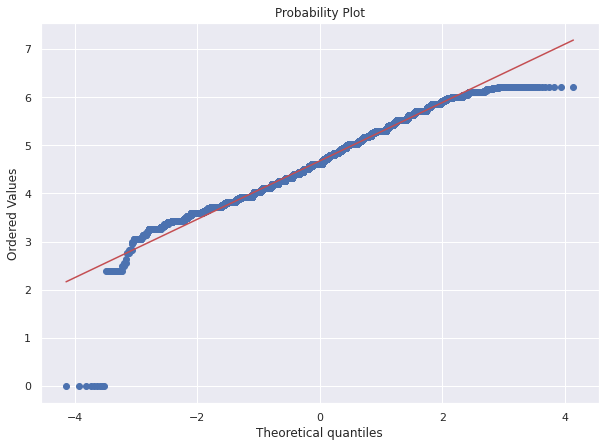

In [613]:
# берем логарифм от цены
data['Logprice'] = np.log1p(data.price)

plt.figure(figsize=(10,7))
sns.distplot(data.Logprice, fit=norm)

# фитим распределение на логарифм от цены
(mu, sigma) = norm.fit(data.Logprice)

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Log of price Density Distribution')

plt.figure(figsize=(10,7))
stats.probplot(data.Logprice, plot=plt)
plt.show()

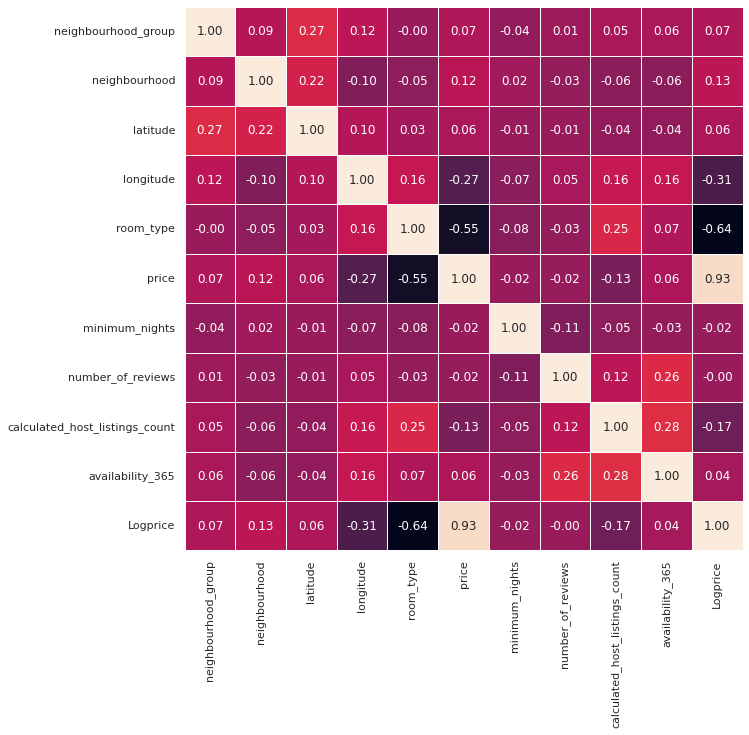

In [614]:
#Посмотрим на кореляцию наших данных еще раз. Корелляция с логарифмированной ценой немногим выше
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

In [615]:
# проверим результаты на логарифмированной цене
data_log=data.drop('price', axis = 1)
ordinal_standart_evaluate(data_log,'Logprice',data_log.Logprice)

{'r2': 0.4839206167527882,
 'mse': -0.33151395643788495,
 'rmse': -0.43471320568686506}

In [616]:
#Видим заметное улучшение, в дальнейшем будем использовать данные логарифмированные
data=data_log
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Logprice
0,1.0,107.0,40.64749,-73.97237,1.0,1,9,6,365,5.010635
1,2.0,126.0,40.75362,-73.98377,0.0,1,45,2,355,5.420535
2,2.0,93.0,40.80902,-73.94190,1.0,3,0,1,365,5.017280
4,2.0,61.0,40.79851,-73.94399,0.0,10,9,1,0,4.394449
5,2.0,136.0,40.74767,-73.97500,0.0,3,74,1,129,5.303305


In [617]:
#приготовим функцию для рассчета расстояния до центра манхеттена 40.776676, -73.971321 с помощью формулы Хавершина
manlon=-73.971321
manlat=40.776676
def haversine_np(lon1, lat1):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, manlon, manlat])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [618]:
import copy
dataMan=copy.deepcopy(data)
dataMan['ManDistance']= haversine_np(dataMan.longitude,dataMan.latitude)
dataMan.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Logprice,ManDistance
0,1.0,107.0,40.64749,-73.97237,1.0,1,9,6,365,5.010635,14.356081
1,2.0,126.0,40.75362,-73.98377,0.0,1,45,2,355,5.420535,2.768066
2,2.0,93.0,40.80902,-73.94190,1.0,3,0,1,365,5.017280,4.364068
4,2.0,61.0,40.79851,-73.94399,0.0,10,9,1,0,4.394449,3.342883
5,2.0,136.0,40.74767,-73.97500,0.0,3,74,1,129,5.303305,3.238135


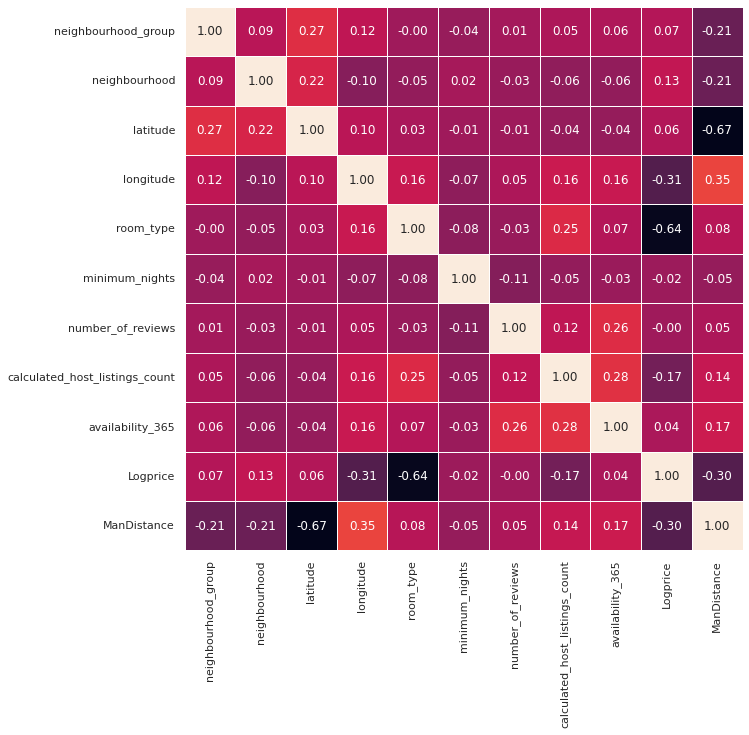

In [619]:
#Посмотрим на кореляцию наших данных еще раз. Корелляция с логарифмированной ценой немногим выше
plt.figure(figsize=(10, 10))
sns.heatmap(dataMan.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

In [620]:
#Кореляция значительных изменений не возымела, а что с общим результатом?
ordinal_standart_evaluate(dataMan,'Logprice',dataMan.Logprice)

{'r2': 0.5144145482916158,
 'mse': -0.32188489685749755,
 'rmse': -0.42152976940904213}

In [621]:
#Попробуем выкинуть стартовые данные, по которым велся рассчет
list_to_drop=[ "latitude","longitude"]
dataManWithDrop=dataMan.drop(list_to_drop,axis=1)
ordinal_standart_evaluate(dataManWithDrop,'Logprice',dataManWithDrop.Logprice)

{'r2': 0.48549762970318067,
 'mse': -0.3339415027051517,
 'rmse': -0.43382213027846694}

In [622]:
#вспомним какие были показатели без добавочной переменной
ordinal_standart_evaluate(data,'Logprice',data.Logprice)

{'r2': 0.4839206167527882,
 'mse': -0.33151395643788495,
 'rmse': -0.43471320568686506}

In [623]:
# Соотвественно добавочную переменную будем использовать, но данные выкидывать не будем
data=dataMan
ordinal_standart_evaluate(data,'Logprice',data.Logprice)


{'r2': 0.5144145482916158,
 'mse': -0.32188489685749755,
 'rmse': -0.42152976940904213}

In [624]:
# Приготовим набор для тренировки и тестирования
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Logprice'], axis=1), data['Logprice'], test_size=0.30, random_state=42
)

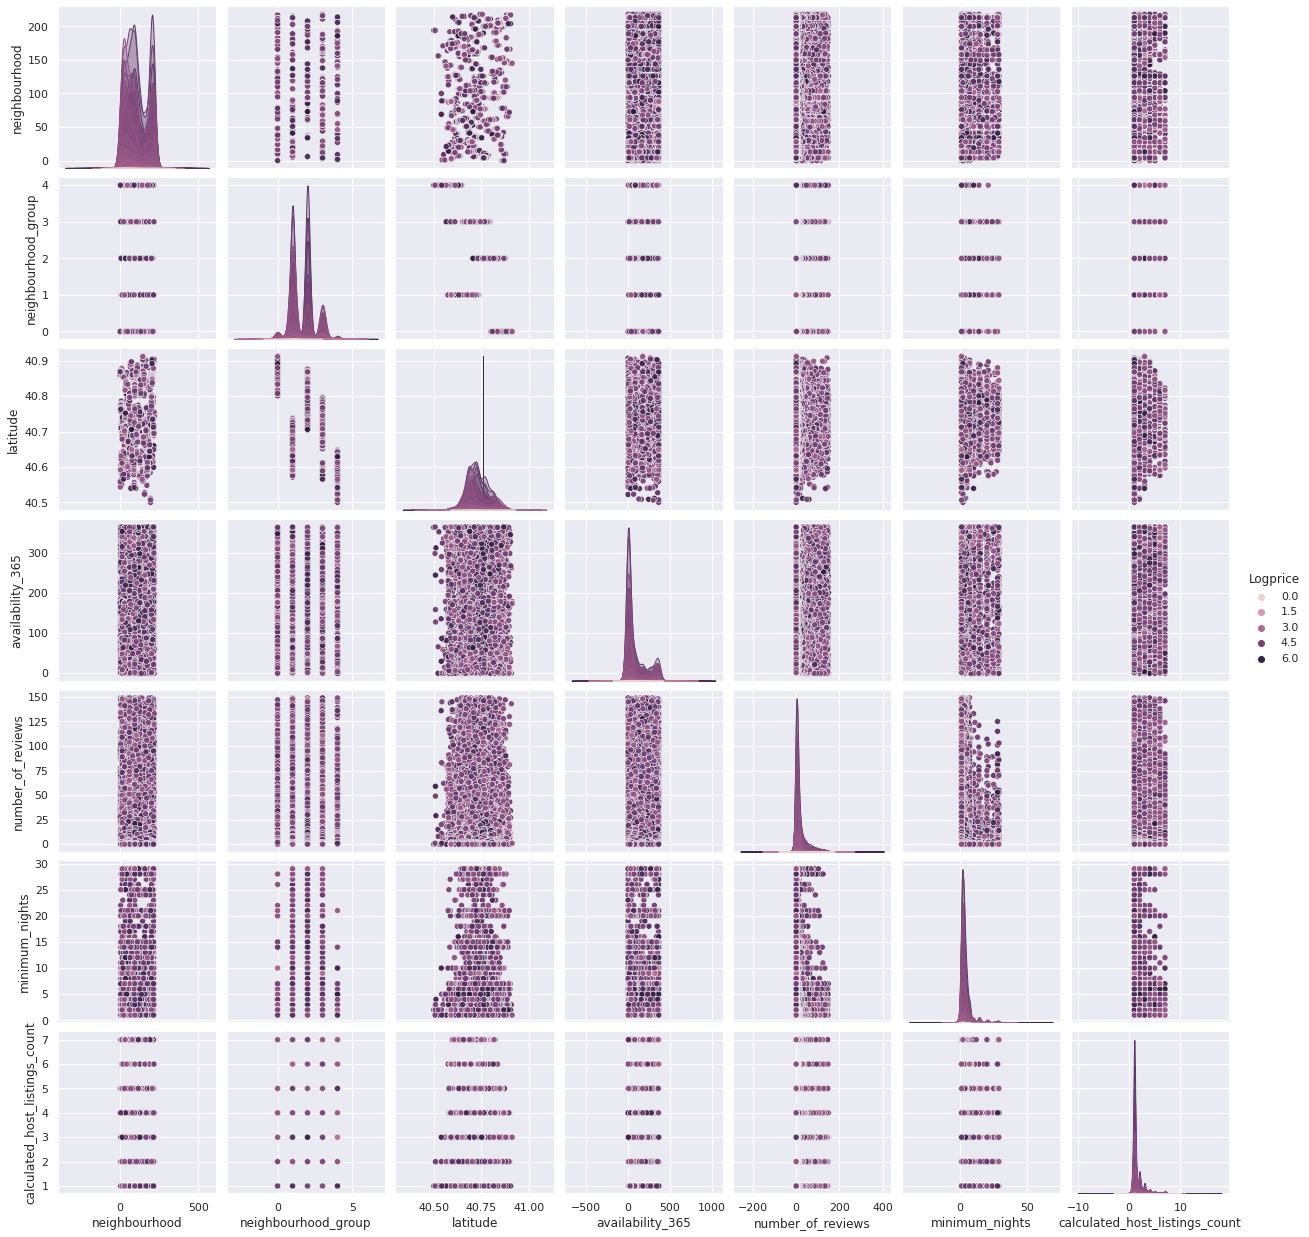

In [625]:
# Посмотрим еще раз на плоты данных
# Проведем корреляционный анализ, получим 8 наиболее корелирующих признаков
k = 8 
corrmat = data.corr()
cols = corrmat.nlargest(k, 'Logprice')['Logprice'].index.tolist()
sns.pairplot(data=data[cols], hue='Logprice')
plt.show()

In [629]:
#Опробуем обучение RidgeCV, LassoCV и ElasticNetCV и сравним с LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
results={}
for model in LinearRegression(),Lasso(alpha = 100),Ridge(alpha = 100),ElasticNet(alpha = 100):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    result={}
    result["Test MSE"]=mean_squared_error(y_test, y_pred)
    result["Train MSE"]=mean_squared_error(y_train, y_train_pred)
    result["Test MAE"]=mean_absolute_error(y_test, y_pred)
    result["Train MAE"]=mean_absolute_error(y_train, y_train_pred)
    results[type(model).__name__]=result
pd.DataFrame(results)

,LinearRegression,Lasso,Ridge,ElasticNet
Test MSE,0.179863,0.379334,0.184555,0.379334
Train MSE,0.175830,0.367596,0.179251,0.367596
Test MAE,0.321707,0.502683,0.327184,0.502683
Train MAE,0.320679,0.496983,0.325471,0.496983


Самые хорошие показатели у стандартной модели linear_regression(что удивительно, а так же при увеличении alpha MSE,MAE только растут, сходимость при нуле, но тогда они просто превращаются в линейную регрессию по умолчанию)